# Overview
In this notebook, I will prepare the dataset for modeling. 
To estimate the expected loss, we need three component in the Credit Risk modeling.

<b>Expected loss (EL) = Probability of Default (PD) * Loss given default(LGD) * Exposure at Default (EAD)</b> <br>

<b>PD Model</b>
What's the probability of Default?
* Dependent Variable: bad loan categories in loan_status

<b>LGD Model: How much loan was recovered after default?</b>
* Dependent Variable - Recovery Column

<b> EAD Model: total recovered principal column</b>


## Dataset Description

The dataset contains all available data for more than 800,000 consumer loans issued from 2007 to 2015 by Lending Club: a large US peer-to-peer lending company. <br>

There are several different versions of this dataset. We have used a version available on kaggle.com. You can find it here: https://www.kaggle.com/wendykan/lending-club-loan-data/version/1

We divided the data into two periods because we assume that some data are available at the moment when we need to build Expected Loss models, and some data comes from applications after. Later, we investigate whether the applications we have after we built the Probability of Default (PD) model have similar characteristics with the applications we used to build the PD model.

## Load the data & Look at the data Dictionary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#  option=0 -> preprocess training data, lese, preprocess testing data
option=1

In [2]:

loan_data_backup = pd.read_csv('Dataset/loan_data_2007_2014.csv')
loan_data = loan_data_backup.copy()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Read Data Dictionary Data
LoanStats=pd.read_excel('Dataset/original.xlsx',sheet_name=0)
browseNotes=pd.read_excel('Dataset/original.xlsx',sheet_name=1)
RejectStats=pd.read_excel('Dataset/original.xlsx',sheet_name=2)

In [4]:
from IPython.display import display, HTML
display(HTML(LoanStats.to_html()),include=None)

,LoanStatNew,Description
0,addr_state,The state provided by the borrower in the loan application
1,annual_inc,The self-reported annual income provided by the borrower during registration.
2,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
3,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
4,collection_recovery_fee,post charge off collection fee
5,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
6,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
7,desc,Loan description provided by the borrower
8,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
9,dti_joint,"A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income"


## Exploratory Data Analysis

In [5]:
pd.options.display.max_columns = None
#pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [6]:
loan_data

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773

In [7]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
loan_data.tail()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773xx,TX,19.85,0.0,Apr-03,2.0,NaN,NaN,18.0,0.0,23208,77.6,36.0,w,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.0,0.0,0.0,Jan-16,432.64,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,294998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,78000.0,Verified,Jan-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,377xx,TN,18.45,0.0,Jun-97,5.0,NaN,116.0,18.0,1.0,18238,46.3,30.0,f,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.0,0.0,0.0,Dec-14,17.50,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,221830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,7 years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/06/13 > I am going to c...,debt_consolidation,Debt consolidation,458xx,OH,25.65,0.0,Dec-01,2.0,65.0,NaN,18.0,0.0,6688,51.1,43.0,f,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.0,0.0,0.0,Jan-16,514.34,Feb-16,Dec-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,73598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,3 years,OWN,83000.0,Verified,Jan-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,913xx,CA,5.39,3.0,Feb-03,1.0,13.0,NaN,21.0,0.0,11404,21.5,27.0,w,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.0,0.0,0.0,Dec-14,1500.68,NaN,Apr-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,591610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN
466284,466284,9199665,11061576,10000,10000,9975.0,36 months,19.20,367.58,D,D3,NaN,10+ years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/04/13 > I will like a l...,other,Other,950xx,CA,22.78,1.0,Feb-00,0.0,9.0,NaN,6.0,0.0,11325,70.8,22.0,f,3984.38,3974.41,8821.620000,8799.57,6015.62,2806.00,0.0,0.0,0.0,Jan-16,367.58,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,57477.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,NaN,NaN


In [9]:
loan_data.columns.values
# Displays all column names.

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [10]:
loan_data.info()
# Displays column names, complete (non-missing) cases per column, and datatype per column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
Unnamed: 0                     466285 non-null int64
id                             466285 non-null int64
member_id                      466285 non-null int64
loan_amnt                      466285 non-null int64
funded_amnt                    466285 non-null int64
funded_amnt_inv                466285 non-null float64
term                           466285 non-null object
int_rate                       466285 non-null float64
installment                    466285 non-null float64
grade                          466285 non-null object
sub_grade                      466285 non-null object
emp_title                      438697 non-null object
emp_length                     445277 non-null object
home_ownership                 466285 non-null object
annual_inc                     466281 non-null float64
verification_status            466285 non-null object
issue_d                   

# Preprocessing for Datatime variables
* emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than 1 year and 10 means 10 or more years. 
* term: The number of payments on the loan. Values are in months and can be either 36 or 60. 
* earliest_cr_line: The month the borrower's earliest reported credit line was opened
* issue day: find number of months since the loan issued


## emp_length

How to do it? <br>
1. Extract the numerical element from the Categorical data
2. Use a specific date to calculate difference.
3. Remove data that don't make sense.

In [11]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [12]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',  str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')

# Type transformation
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [13]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')
# Assume we are in 2017, we want to calculate the difference between two dates in months.
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

In [14]:
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [15]:
print("The Negative value means the loans are lending post 2017, which is unreliable. Since the data on our hand is loans made prior to 2014, so we need to remove it.")

print("Total Negative values count: ",sum(loan_data['mths_since_earliest_cr_line'] < 0) )
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()


The Negative value means the loans are lending post 2017, which is unreliable. Since the data on our hand is loans made prior to 2014, so we need to remove it.
Total Negative values count:  1169


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## Terms

In [16]:
loan_data['term'].describe()

count         466285
unique             2
top        36 months
freq          337953
Name: term, dtype: object

In [17]:
loan_data['term_int'] = pd.to_numeric(loan_data['term'].str.replace(' months', ''))
loan_data['term_int']

0         36
1         60
2         36
3         36
4         60
          ..
466280    60
466281    60
466282    60
466283    36
466284    36
Name: term_int, Length: 466285, dtype: int64

## Issue day

In [18]:
loan_data['issue_d'].describe()

count     466285
unique        91
top       Oct-14
freq       38782
Name: issue_d, dtype: object

In [19]:
# Assume we are now in December 2017
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')
loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['issue_d_date']) / np.timedelta64(1, 'M')))
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
loan_data['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

# Preprocessing discrete variables

In [20]:
loan_data.info()
# Displays column names, complete (non-missing) cases per column, and datatype per column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 81 columns):
Unnamed: 0                     466285 non-null int64
id                             466285 non-null int64
member_id                      466285 non-null int64
loan_amnt                      466285 non-null int64
funded_amnt                    466285 non-null int64
funded_amnt_inv                466285 non-null float64
term                           466285 non-null object
int_rate                       466285 non-null float64
installment                    466285 non-null float64
grade                          466285 non-null object
sub_grade                      466285 non-null object
emp_title                      438697 non-null object
emp_length                     445277 non-null object
home_ownership                 466285 non-null object
annual_inc                     466281 non-null float64
verification_status            466285 non-null object
issue_d                   

## Preprocess the following
grade, sub_grade, home_ownership, verification_status, loan_status, purpose, addr_state, initial_list_status.

In [21]:
# Create dummies with prefix
pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':')

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [22]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)


In [23]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)


print("Before preprocessing, loan data shape: ", loan_data_backup.shape)
print("After preprocessing, loan data shape: ", loan_data.shape)

Before preprocessing, loan data shape:  (466285, 75)
After preprocessing, loan data shape:  (466285, 207)


### Check for missing values and clean

In [24]:
pd.options.display.max_rows = None
pd.options.display.max_rows = 100

In [25]:
percent_missing = round(loan_data.isnull().sum() * 100 / len(loan_data),2)



missing_value_df = pd.DataFrame({'column_name': loan_data.columns,
                                 'percent_missing': percent_missing})


missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
missing_value_df.reset_index(drop=True,inplace=True)

In [26]:
missing_value_df[missing_value_df['percent_missing']>30]

,column_name,percent_missing
0,open_il_12m,100.00
1,max_bal_bc,100.00
2,open_acc_6m,100.00
3,open_il_6m,100.00
4,open_il_24m,100.00
5,mths_since_rcnt_il,100.00
6,total_bal_il,100.00
7,il_util,100.00
8,open_rv_12m,100.00
9,open_rv_24m,100.00


In [27]:
missing_value_df[(missing_value_df['percent_missing']>0) & (missing_value_df['percent_missing']<30)  ]

,column_name,percent_missing
22,tot_cur_bal,15.07
23,tot_coll_amt,15.07
24,total_rev_hi_lim,15.07
25,emp_title,5.92
26,emp_length,4.51
27,emp_length_int,4.51
28,last_pymnt_d,0.08
29,revol_util,0.07
30,collections_12_mths_ex_med,0.03
31,inq_last_6mths,0.01


In [28]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace=True)
loan_data['total_rev_hi_lim'].isnull().sum()

0

In [29]:
loan_data['annual_inc'].isnull().sum()
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(),inplace=True)

In [30]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)


# PD model

## Data preparation

In the PD model, we want to first label which loans are goods versus which loans are bad. We consider "charge off", "default" as two forms of default. In the dataset, there's also "Does not meet the credit policy. Status:Charged Off" value in Loan status.

<b>Those four categories: Charge Off/ Default/ Does not meet the credt policy/ Late (31~120 days) </b>
are considered to be bad debt.

In [31]:
print("let's have a look at loan types:", loan_data['loan_status'].unique())

let's have a look at loan types: ['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']


In [32]:
round(100*loan_data['loan_status'].value_counts() / loan_data['loan_status'].count(),2)

Current                                                48.09
Fully Paid                                             39.62
Charged Off                                             9.11
Late (31-120 days)                                      1.48
In Grace Period                                         0.67
Does not meet the credit policy. Status:Fully Paid      0.43
Late (16-30 days)                                       0.26
Default                                                 0.18
Does not meet the credit policy. Status:Charged Off     0.16
Name: loan_status, dtype: float64

In [33]:
# Good/ Bad Definition
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)']), 0, 1)

In [34]:
# Finished preparing Target Varaible.
loan_data['good_bad']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int64

### Splitting Data
option=0 for training data preprocessing
option=1 for testing data preprocessing

In [35]:

from sklearn.model_selection import train_test_split

inputs_x = loan_data.drop('good_bad', axis = 1)
target_y = loan_data['good_bad']

loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(inputs_x,target_y , test_size = 0.2, random_state = 1)



if(option==0):
    df_inputs_prepr = loan_data_inputs_train
    df_targets_prepr = loan_data_targets_train
    
else:
    df_inputs_prepr = loan_data_inputs_test
    df_targets_prepr = loan_data_targets_test

In [36]:
print(loan_data_inputs_train.shape)
print(loan_data_targets_train.shape)
print(loan_data_inputs_test.shape)
print(loan_data_targets_test.shape)

(373028, 207)
(373028,)
(93257, 207)
(93257,)


### Data Preparation: An Example

In [37]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    '''
    Input: loan_data, the column of interest with discrete variables, and the target variable
    
    
    Output: a featured dataframe with Information value and Weight of evidence.
    '''
    # concat the two column of interst
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    
    # concat the mean/ count of target
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    
    # omit target variable
    df = df.iloc[:, [0, 1, 3]]
    
    # rename
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    

    # craft % of observation, # of good, # of bad, and WOE
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    
    # calculate WOE & IV
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    
    ## Take the difference between two subsequent values of a column. Then get a absolute value
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    
    return df


In [38]:

def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    '''
    Below we define a function that takes 2 arguments: a dataframe and a number.
    The number parameter has a default value of 0.
    This means that if we call the function and omit the number parameter, it will be executed with it having a value of 0.
    '''
    x = np.array(df_WoE.iloc[: , 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

In [39]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,666,0.725225,0.007142,483.0,183.0,0.005821,0.017805,-1.118051,NaN,NaN,0.295598
1,F,2648,0.745468,0.028395,1974.0,674.0,0.023789,0.065577,-1.013995,0.020243,0.104057,0.295598
2,E,7155,0.802376,0.076723,5741.0,1414.0,0.069186,0.137575,-0.687371,0.056908,0.326624,0.295598
3,D,15498,0.843528,0.166186,13073.0,2425.0,0.157546,0.235941,-0.403864,0.041152,0.283507,0.295598
4,C,25038,0.885614,0.268484,22174.0,2864.0,0.267224,0.278653,-0.041881,0.042086,0.361984,0.295598
5,B,27347,0.922697,0.293243,25233.0,2114.0,0.304089,0.205682,0.390989,0.037083,0.432870,0.295598
6,A,14905,0.959477,0.159827,14301.0,604.0,0.172345,0.058766,1.075929,0.036779,0.684940,0.295598


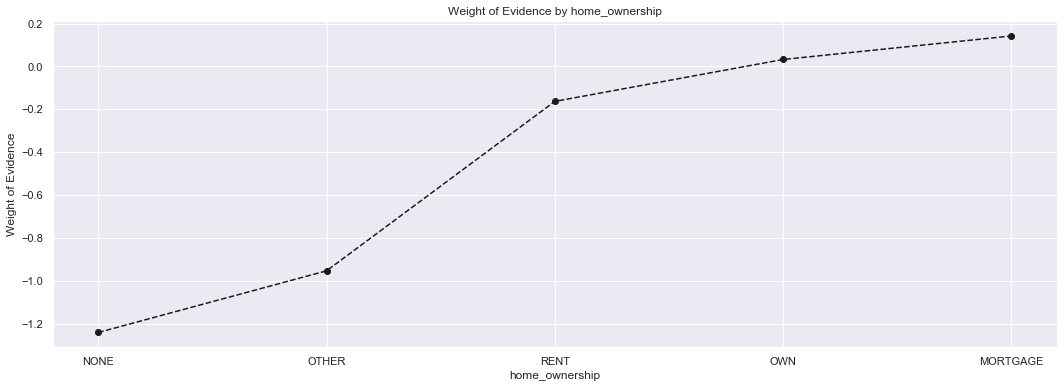

In [40]:
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
plot_by_woe(df_temp)


### Preprocessing Discrete Variables: Creating Dummy Variables, Part 1

In [41]:
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NONE,10,0.700000,0.000107,7.0,3.0,0.000084,0.000292,-1.241284,NaN,NaN,0.022033
1,OTHER,37,0.756757,0.000397,28.0,9.0,0.000337,0.000876,-0.953602,0.056757,0.287682,0.022033
2,RENT,37746,0.872755,0.404752,32943.0,4803.0,0.397004,0.467309,-0.163044,0.115998,0.790558,0.022033
3,OWN,8182,0.892936,0.087736,7306.0,876.0,0.088046,0.085231,0.032503,0.020181,0.195547,0.022033
4,MORTGAGE,47282,0.902986,0.507008,42695.0,4587.0,0.514528,0.446293,0.142274,0.010051,0.109770,0.022033


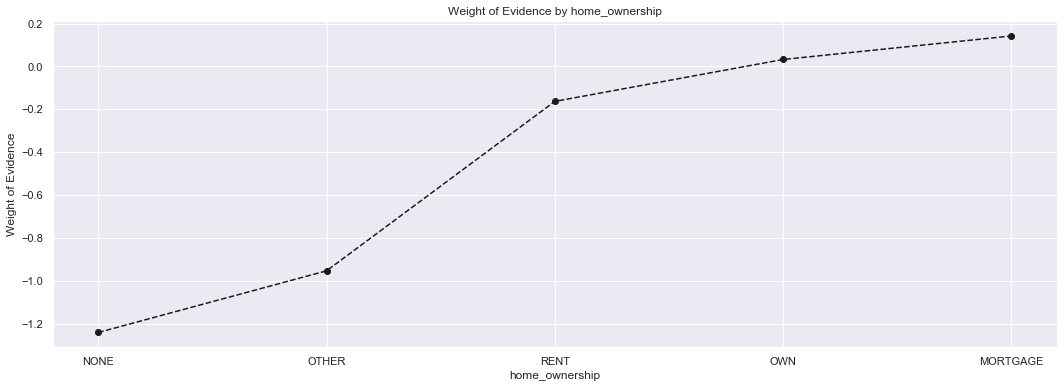

In [42]:
plot_by_woe(df_temp)

In [43]:
# There are many categories with very few observations and many categories with very different "good" %.
# Therefore, we create a new discrete variable where we combine some of the categories.
# 'OTHERS' and 'NONE' are riskiest but are very few. 'RENT' is the next riskiest.
# 'ANY' are least risky but are too few. Conceptually, they belong to the same category. Also, their inclusion would not change anything.
# We combine them in one category, 'RENT_OTHER_NONE_ANY'.
# We end up with 3 categories: 'RENT_OTHER_NONE_ANY', 'OWN', 'MORTGAGE'.
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'], df_inputs_prepr['home_ownership:NONE'], df_inputs_prepr['home_ownership:ANY']])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


### Preprocessing Discrete Variables: Creating Dummy Variables, Part 2

In [44]:
loan_data['addr_state'].unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [45]:
# 'addr_state'
df_inputs_prepr['addr_state'].unique()

array(['OR', 'NY', 'NC', 'CA', 'OH', 'VA', 'MI', 'AZ', 'PA', 'MA', 'NV',
       'FL', 'NJ', 'GA', 'OK', 'IL', 'TX', 'WA', 'AL', 'DC', 'CO', 'MO',
       'SC', 'MD', 'HI', 'LA', 'AK', 'MN', 'TN', 'IN', 'WI', 'CT', 'WY',
       'NM', 'MS', 'KS', 'AR', 'RI', 'UT', 'NH', 'KY', 'MT', 'WV', 'VT',
       'SD', 'DE', 'ID', 'NE', 'IA', 'ME'], dtype=object)

In [46]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NV,1250,0.853600,0.013404,1067.0,183.0,0.012859,0.017805,-0.325462,NaN,NaN,inf
1,AL,1168,0.872432,0.012525,1019.0,149.0,0.012280,0.014497,-0.165951,0.018832,0.159511,inf
2,FL,6380,0.873511,0.068413,5573.0,807.0,0.067162,0.078517,-0.156217,0.001079,0.009734,inf
3,MO,1490,0.878523,0.015977,1309.0,181.0,0.015775,0.017610,-0.110060,0.005013,0.046157,inf
4,NY,8025,0.878629,0.086053,7051.0,974.0,0.084973,0.094766,-0.109068,0.000106,0.000992,inf
5,DE,256,0.878906,0.002745,225.0,31.0,0.002712,0.003016,-0.106469,0.000277,0.002600,inf
6,UT,714,0.880952,0.007656,629.0,85.0,0.007580,0.008270,-0.087102,0.002046,0.019367,inf
7,KY,844,0.881517,0.009050,744.0,100.0,0.008966,0.009730,-0.081711,0.000564,0.005391,inf
8,MA,2230,0.881614,0.023912,1966.0,264.0,0.023693,0.025686,-0.080775,0.000098,0.000936,inf
9,LA,1044,0.882184,0.011195,921.0,123.0,0.011099,0.011967,-0.075306,0.000570,0.005468,inf


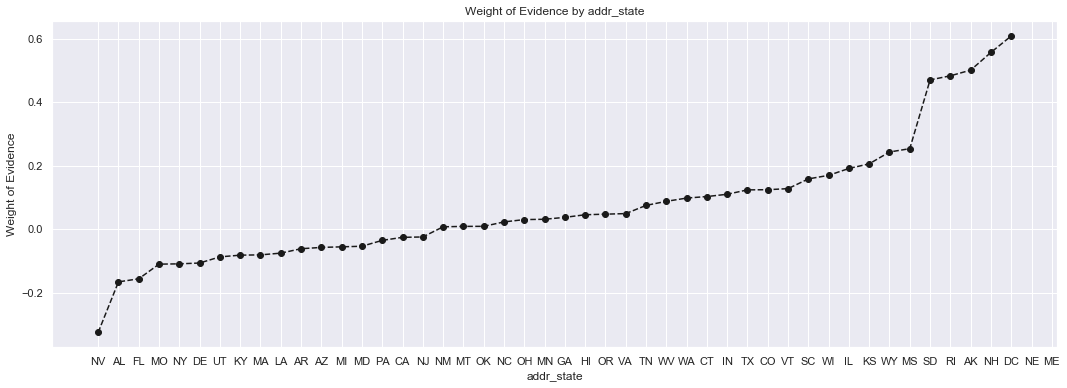

In [47]:
plot_by_woe(df_temp)

In [48]:
if(['addr_state:ND'] in df_inputs_prepr.columns.values):
    pass
else:
    df_inputs_prepr['addr_state:ND']=0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [49]:
# We create the following categories:
# 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'
# 'IA_NV_HI_ID_AL_FL' will be the reference category.


df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'], df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'], df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

### Preprocessing Discrete Variables: Homework

In [50]:
# 'verification_status'
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,33590,0.870199,0.360187,29230.0,4360.0,0.352258,0.424207,-0.185858,NaN,NaN,0.023031
1,Source Verified,30193,0.896930,0.323761,27081.0,3112.0,0.326360,0.302783,0.074985,0.026730,0.260843,0.023031
2,Not Verified,29474,0.904797,0.316051,26668.0,2806.0,0.321383,0.273010,0.163122,0.007868,0.088138,0.023031


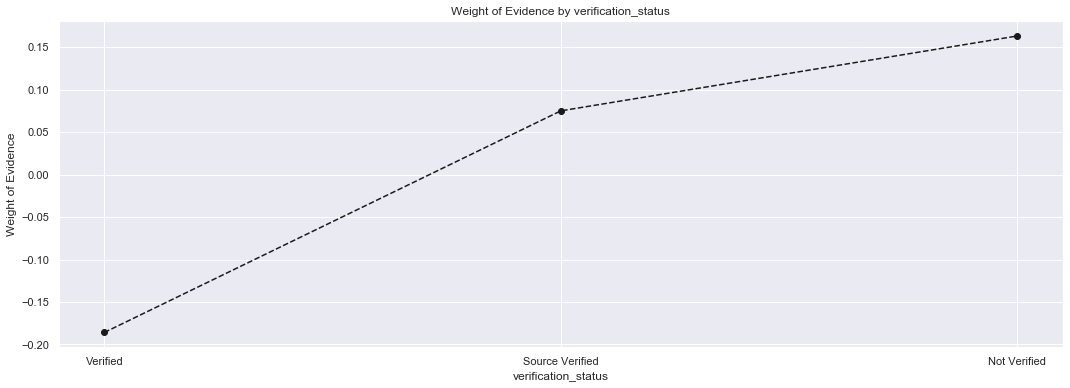

In [51]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [52]:
# 'purpose'
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,small_business,1399,0.777698,0.015002,1088.0,311.0,0.013112,0.030259,-0.836278,NaN,NaN,0.04388
1,educational,93,0.817204,0.000997,76.0,17.0,0.000916,0.001654,-0.591062,0.039506,0.245216,0.04388
2,moving,587,0.834753,0.006294,490.0,97.0,0.005905,0.009438,-0.468887,0.017549,0.122174,0.04388
3,other,4722,0.850911,0.050634,4018.0,704.0,0.048422,0.068496,-0.346821,0.016158,0.122067,0.04388
4,house,454,0.854626,0.004868,388.0,66.0,0.004676,0.006421,-0.317231,0.003715,0.029589,0.04388
5,medical,931,0.857143,0.009983,798.0,133.0,0.009617,0.012940,-0.296822,0.002517,0.020409,0.04388
6,wedding,456,0.859649,0.004890,392.0,64.0,0.004724,0.006227,-0.276203,0.002506,0.020619,0.04388
7,renewable_energy,75,0.866667,0.000804,65.0,10.0,0.000783,0.000973,-0.216780,0.007018,0.059423,0.04388
8,vacation,517,0.882012,0.005544,456.0,61.0,0.005495,0.005935,-0.076963,0.015345,0.139817,0.04388
9,debt_consolidation,54870,0.886514,0.588374,48643.0,6227.0,0.586209,0.605857,-0.032969,0.004502,0.043994,0.04388


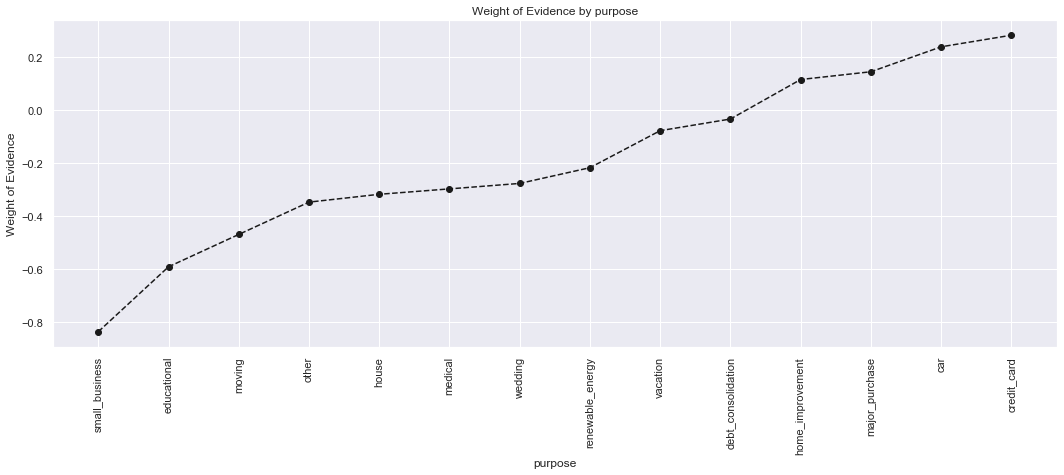

In [53]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [54]:
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [55]:
# 'initial_list_status'
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,60477,0.878384,0.648498,53122.0,7355.0,0.640186,0.715606,-0.111371,NaN,NaN,0.02614
1,w,32780,0.910830,0.351502,29857.0,2923.0,0.359814,0.284394,0.235227,0.032446,0.346598,0.02614


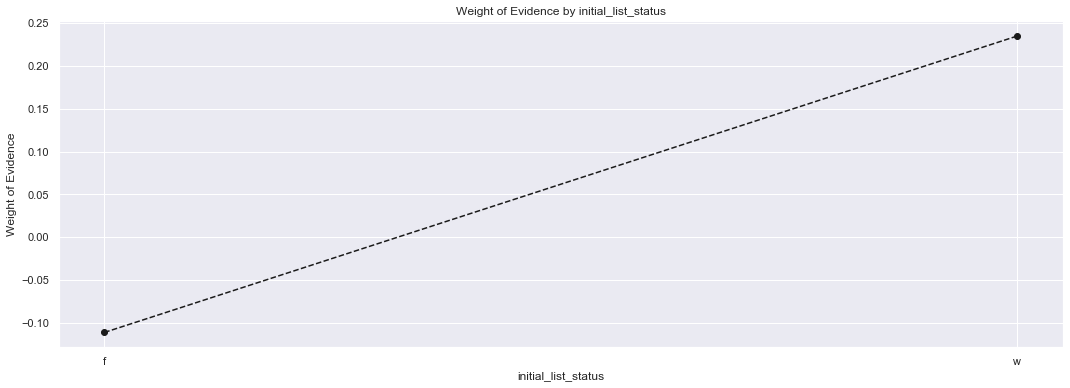

In [56]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

### Preprocessing Continuous Variables: Automating Calculations and Visualizing Results

In [57]:
# WoE function for ordered discrete and continuous variables
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we define a function similar to the one above, ...
# ... with one slight difference: we order the results by the values of a different column.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 1

In [58]:
# term
df_inputs_prepr['term_int'].unique()
# There are only two unique values, 36 and 60.

array([36, 60])

In [59]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,67512,0.901721,0.723935,60877.0,6635.0,0.733643,0.645554,0.127915,NaN,NaN,0.036437
1,60,25745,0.858497,0.276065,22102.0,3643.0,0.266357,0.354446,-0.285721,0.043224,0.413636,0.036437


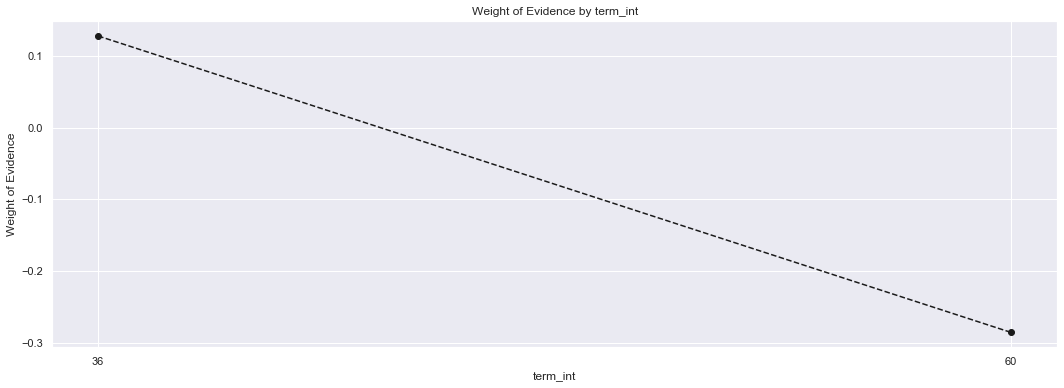

In [60]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [61]:
# Leave as is.
# '60' will be the reference category.
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [62]:
# emp_length_int
df_inputs_prepr['emp_length_int'].unique()
# Has only 11 levels: from 0 to 10. Hence, we turn it into a factor with 11 levels.

array([ 2., 10.,  8.,  7.,  4.,  9.,  3.,  6.,  5.,  1.,  0.])

In [63]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,11511,0.872209,0.123433,10040.0,1471.0,0.120994,0.143121,-0.167947,NaN,NaN,0.008723
1,1.0,5793,0.891248,0.062119,5163.0,630.0,0.062221,0.061296,0.014971,0.019039,0.182919,0.008723
2,2.0,8341,0.891500,0.089441,7436.0,905.0,0.089613,0.088052,0.017572,0.000252,0.002600,0.008723
3,3.0,7444,0.886486,0.079822,6599.0,845.0,0.079526,0.082214,-0.033245,0.005014,0.050817,0.008723
4,4.0,5557,0.892388,0.059588,4959.0,598.0,0.059762,0.058183,0.026787,0.005902,0.060032,0.008723
5,5.0,6064,0.886544,0.065025,5376.0,688.0,0.064787,0.066939,-0.032671,0.005844,0.059458,0.008723
6,6.0,5112,0.883412,0.054816,4516.0,596.0,0.054423,0.057988,-0.063441,0.003132,0.030770,0.008723
7,7.0,5152,0.883346,0.055245,4551.0,601.0,0.054845,0.058474,-0.064075,0.000065,0.000634,0.008723
8,8.0,4410,0.888209,0.047289,3917.0,493.0,0.047205,0.047967,-0.016010,0.004862,0.048065,0.008723
9,9.0,3664,0.879913,0.039289,3224.0,440.0,0.038853,0.042810,-0.096978,0.008296,0.080969,0.008723


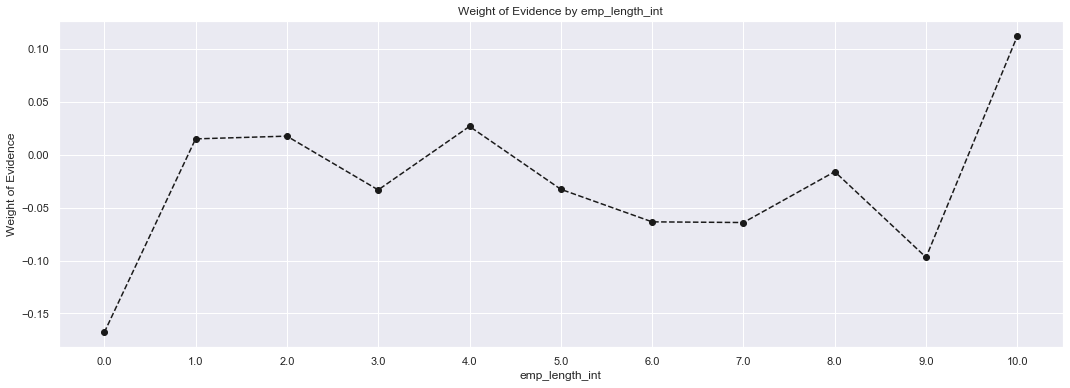

In [64]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [65]:
# We create the following categories: '0', '1', '2 - 4', '5 - 6', '7 - 9', '10'
# '0' will be the reference category
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

### Preprocessing Continuous Variables: Creating Dummy Variables

In [66]:
df_inputs_prepr['mths_since_issue_d'].unique()

array([ 45.,  41.,  51.,  54.,  50.,  72.,  37.,  44.,  38.,  70.,  49.,
        62.,  89.,  46.,  47.,  53.,  68.,  58.,  56., 102., 103.,  59.,
        64.,  43.,  48.,  55.,  57.,  65.,  36.,  40.,  42.,  61.,  39.,
       112.,  52.,  75.,  60.,  71.,  93.,  90., 109.,  73., 124.,  81.,
        63.,  76.,  94.,  98.,  79.,  95.,  66.,  87.,  77.,  80., 118.,
        91.,  86.,  78.,  69.,  88.,  67.,  82.,  84., 117.,  74.,  83.,
        85., 119.,  97.,  96., 113., 107., 120., 100., 106., 121.,  99.,
       110., 104., 111., 105., 114., 101., 108., 115., 122.,  92., 123.,
       116., 125., 126.])

In [67]:
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
df_inputs_prepr['mths_since_issue_d_factor']

421662      (43.2, 45.0]
345847      (39.6, 41.4]
87245       (50.4, 52.2]
422411      (43.2, 45.0]
131614      (52.2, 54.0]
               ...      
36508     (100.8, 102.6]
119856      (52.2, 54.0]
388862      (41.4, 43.2]
167163      (57.6, 59.4]
30505       (91.8, 93.6]
Name: mths_since_issue_d_factor, Length: 93257, dtype: category
Categories (50, interval[float64]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] < (124.2, 126.0]]

In [69]:
# mths_since_issue_d
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)

# We calculate weight of evidence.
df_temp

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(35.91, 37.8]",6985,0.942734,0.074901,6585.0,400.0,0.079357,0.038918,0.712503,NaN,NaN,inf
1,"(37.8, 39.6]",9991,0.926534,0.107134,9257.0,734.0,0.111558,0.071415,0.446044,0.016201,0.266459,inf
2,"(39.6, 41.4]",9624,0.917290,0.103199,8828.0,796.0,0.106388,0.077447,0.317503,0.009244,0.128542,inf
3,"(41.4, 43.2]",7182,0.907825,0.077013,6520.0,662.0,0.078574,0.064409,0.198782,0.009465,0.118720,inf
4,"(43.2, 45.0]",7096,0.899662,0.076091,6384.0,712.0,0.076935,0.069274,0.104890,0.008163,0.093892,inf
5,"(45.0, 46.8]",3076,0.897594,0.032984,2761.0,315.0,0.033273,0.030648,0.082194,0.002068,0.022697,inf
6,"(46.8, 48.6]",6197,0.894142,0.066451,5541.0,656.0,0.066776,0.063826,0.045188,0.003452,0.037006,inf
7,"(48.6, 50.4]",5714,0.887119,0.061272,5069.0,645.0,0.061088,0.062755,-0.026933,0.007023,0.072121,inf
8,"(50.4, 52.2]",5175,0.881159,0.055492,4560.0,615.0,0.054954,0.059837,-0.085126,0.005960,0.058193,inf
9,"(52.2, 54.0]",4439,0.866411,0.047600,3846.0,593.0,0.046349,0.057696,-0.218987,0.014748,0.133861,inf


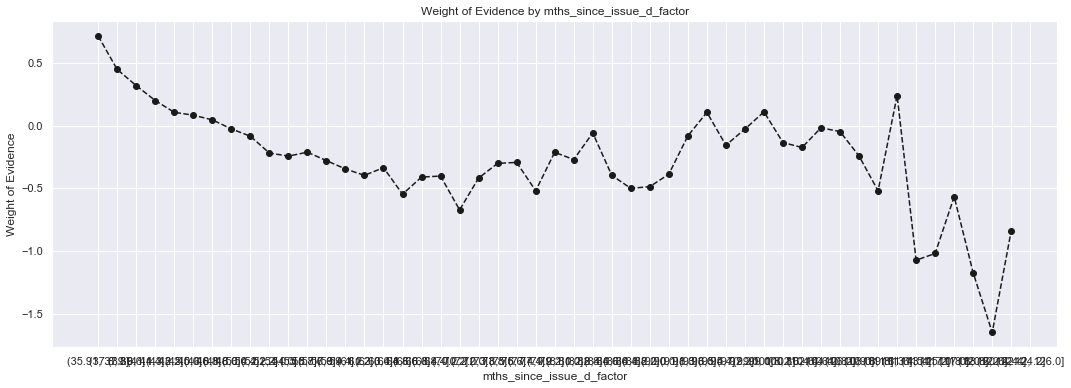

In [70]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.
# We have to rotate the labels because we cannot read them otherwise.

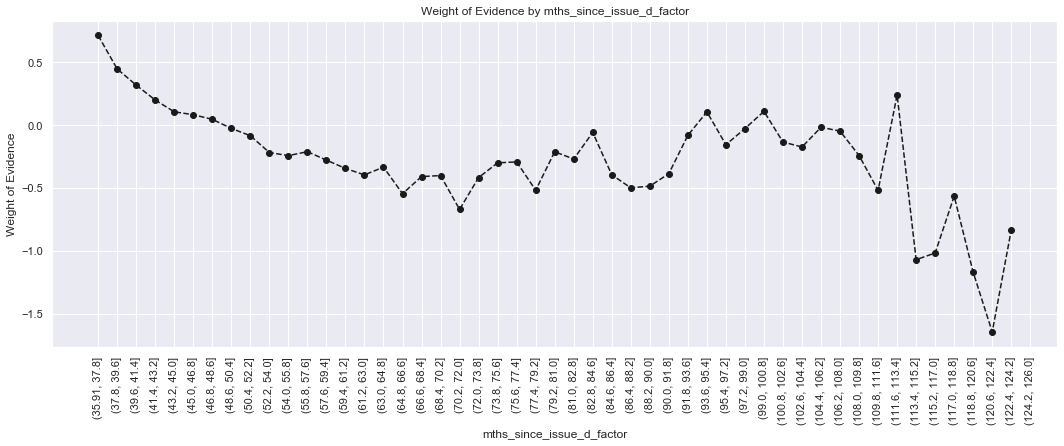

In [71]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values, rotating the labels 90 degrees.

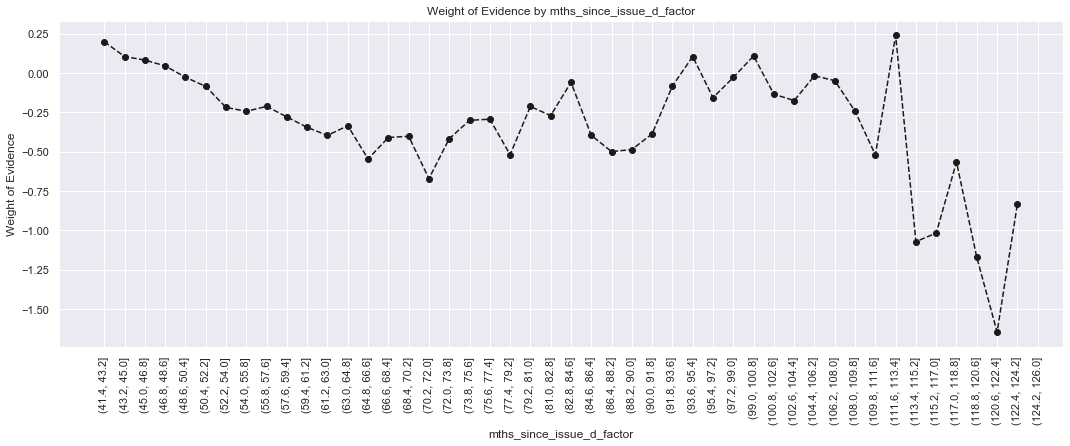

In [72]:
plot_by_woe(df_temp.iloc[3: , : ], 90)
# We plot the weight of evidence values.

In [73]:
# We create the following categories:
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [74]:
# int_rate
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [75]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",188,0.973404,0.002016,183.0,5.0,0.002205,0.000486,1.511466,NaN,NaN,0.358302
1,"(5.833, 6.246]",2027,0.978786,0.021736,1984.0,43.0,0.023910,0.004184,1.743088,0.005382,0.231622,0.358302
2,"(6.246, 6.658]",1924,0.973493,0.020631,1873.0,51.0,0.022572,0.004962,1.514889,0.005294,0.228199,0.358302
3,"(6.658, 7.071]",452,0.977876,0.004847,442.0,10.0,0.005327,0.000973,1.700143,0.004383,0.185254,0.358302
4,"(7.071, 7.484]",786,0.978372,0.008428,769.0,17.0,0.009267,0.001654,1.723296,0.000495,0.023153,0.358302
5,"(7.484, 7.897]",3186,0.962021,0.034164,3065.0,121.0,0.036937,0.011773,1.143430,0.016350,0.579865,0.358302
6,"(7.897, 8.31]",2476,0.940630,0.026550,2329.0,147.0,0.028067,0.014302,0.674180,0.021391,0.469251,0.358302
7,"(8.31, 8.722]",1633,0.965707,0.017511,1577.0,56.0,0.019005,0.005449,1.249346,0.025077,0.575166,0.358302
8,"(8.722, 9.135]",2392,0.936873,0.025650,2241.0,151.0,0.027007,0.014692,0.608816,0.028834,0.640530,0.358302
9,"(9.135, 9.548]",1726,0.967555,0.018508,1670.0,56.0,0.020126,0.005449,1.306645,0.030682,0.697830,0.358302


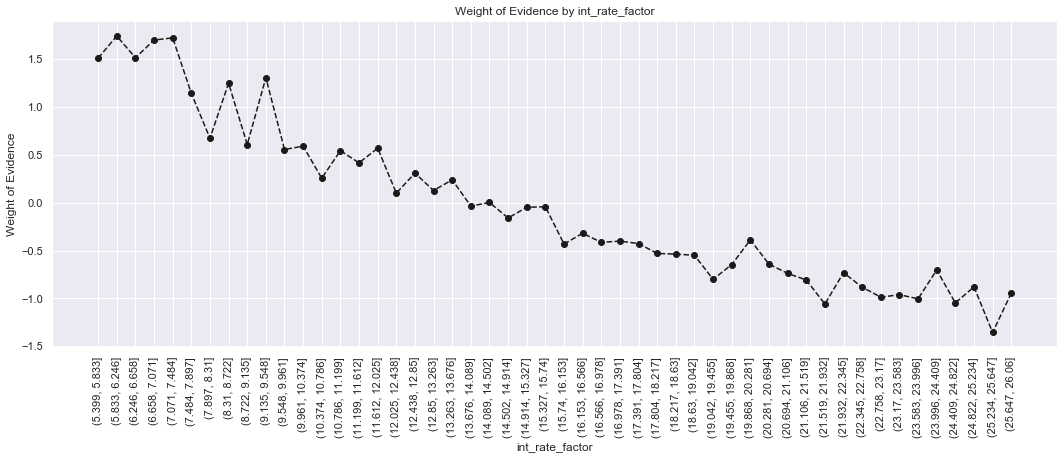

In [76]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [77]:
# '< 9.548', '9.548 - 12.025', '12.025 - 15.74', '15.74 - 20.281', '> 20.281'
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [78]:
# funded_amnt
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",337,0.899110,0.003614,303.0,34.0,0.003652,0.003308,0.098790,NaN,NaN,0.014644
1,"(1190.0, 1880.0]",780,0.892308,0.008364,696.0,84.0,0.008388,0.008173,0.025951,0.006802,0.072839,0.014644
2,"(1880.0, 2570.0]",1521,0.898093,0.016310,1366.0,155.0,0.016462,0.015081,0.087635,0.005786,0.061684,0.014644
3,"(2570.0, 3260.0]",1882,0.894793,0.020181,1684.0,198.0,0.020294,0.019264,0.052078,0.003301,0.035557,0.014644
4,"(3260.0, 3950.0]",1272,0.884434,0.013640,1125.0,147.0,0.013558,0.014302,-0.053476,0.010359,0.105554,0.014644
5,"(3950.0, 4640.0]",2248,0.881228,0.024105,1981.0,267.0,0.023874,0.025978,-0.084473,0.003206,0.030997,0.014644
6,"(4640.0, 5330.0]",3974,0.888022,0.042613,3529.0,445.0,0.042529,0.043296,-0.017886,0.006794,0.066587,0.014644
7,"(5330.0, 6020.0]",4251,0.902141,0.045584,3835.0,416.0,0.046217,0.040475,0.132658,0.014119,0.150544,0.014644
8,"(6020.0, 6710.0]",1746,0.889462,0.018722,1553.0,193.0,0.018716,0.018778,-0.003328,0.012679,0.135986,0.014644
9,"(6710.0, 7400.0]",2969,0.895925,0.031837,2660.0,309.0,0.032056,0.030064,0.064158,0.006463,0.067486,0.014644


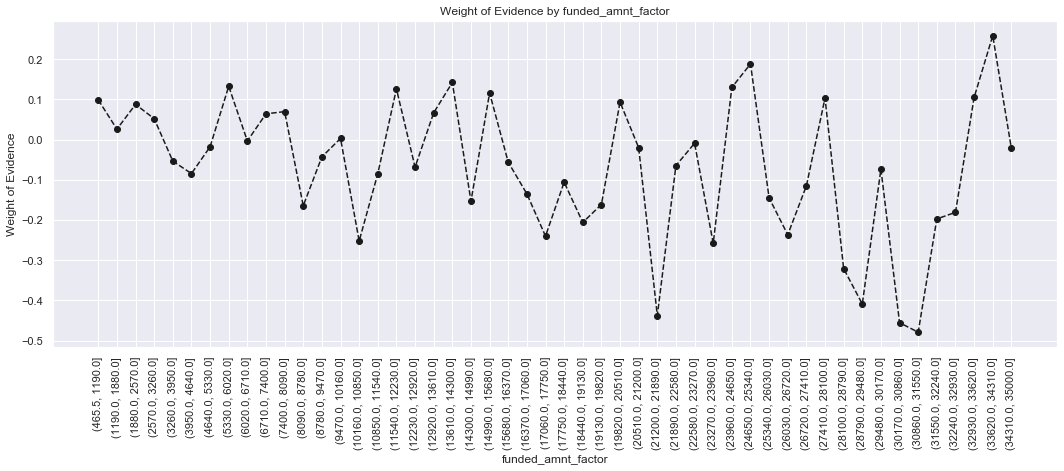

In [79]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

### Data Preparation: Continuous Variables, Part 1 and 2: Homework

In [80]:
# mths_since_earliest_cr_line
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.587, 11.74]",4,1.000000,0.000043,4.0,0.0,0.000048,0.000000,inf,NaN,NaN,inf
1,"(11.74, 23.48]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
2,"(23.48, 35.22]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
3,"(35.22, 46.96]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
4,"(46.96, 58.7]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
5,"(58.7, 70.44]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
6,"(70.44, 82.18]",153,0.895425,0.001641,137.0,16.0,0.001651,0.001557,0.058810,NaN,NaN,inf
7,"(82.18, 93.92]",475,0.858947,0.005093,408.0,67.0,0.004917,0.006519,-0.282007,0.036477,0.340818,inf
8,"(93.92, 105.66]",676,0.877219,0.007249,593.0,83.0,0.007146,0.008076,-0.122228,0.018272,0.159779,inf
9,"(105.66, 117.4]",1255,0.878884,0.013457,1103.0,152.0,0.013293,0.014789,-0.106673,0.001666,0.015555,inf


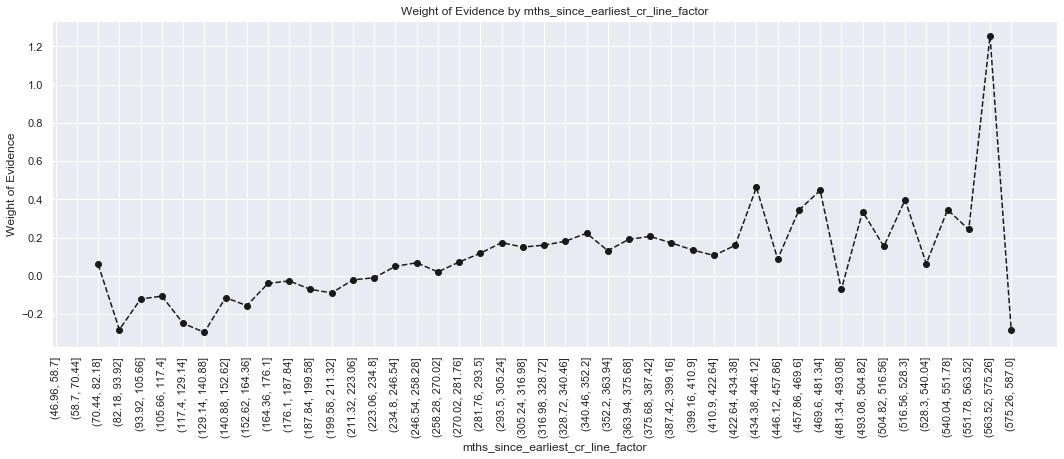

In [81]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

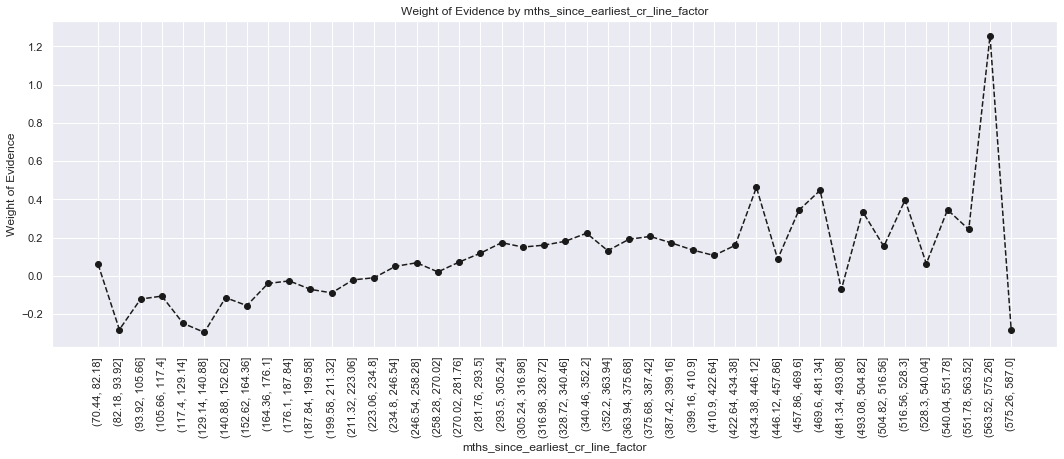

In [82]:
plot_by_woe(df_temp.iloc[6: , : ], 90)
# We plot the weight of evidence values.

In [83]:
# We create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [84]:
# delinq_2yrs
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,76613,0.889966,0.821525,68183.0,8430.0,0.821690,0.820198,0.001817,NaN,NaN,inf
1,1.0,11222,0.891998,0.120334,10010.0,1212.0,0.120633,0.117922,0.022731,0.002031,0.020914,inf
2,2.0,3230,0.880186,0.034635,2843.0,387.0,0.034262,0.037653,-0.094391,0.011812,0.117122,inf
3,3.0,1147,0.878814,0.012299,1008.0,139.0,0.012148,0.013524,-0.107332,0.001371,0.012941,inf
4,4.0,487,0.907598,0.005222,442.0,45.0,0.005327,0.004378,0.196066,0.028783,0.303398,inf
5,5.0,256,0.902344,0.002745,231.0,25.0,0.002784,0.002432,0.134960,0.005254,0.061106,inf
6,6.0,120,0.866667,0.001287,104.0,16.0,0.001253,0.001557,-0.216780,0.035677,0.351740,inf
7,7.0,82,0.853659,0.000879,70.0,12.0,0.000844,0.001168,-0.324993,0.013008,0.108214,inf
8,8.0,41,0.829268,0.000440,34.0,7.0,0.000410,0.000681,-0.508131,0.024390,0.183138,inf
9,9.0,13,1.000000,0.000139,13.0,0.0,0.000157,0.000000,inf,0.170732,inf,inf


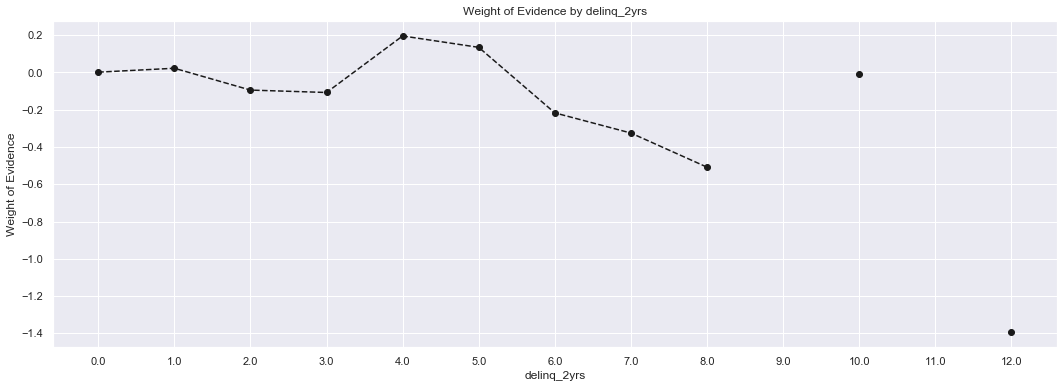

In [85]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [86]:
# Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [87]:
# inq_last_6mths
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,48471,0.907635,0.519757,43994.0,4477.0,0.530182,0.435591,0.196518,NaN,NaN,inf
1,1.0,25975,0.884851,0.278531,22984.0,2991.0,0.276986,0.291010,-0.049391,0.022785,0.245910,inf
2,2.0,11530,0.860624,0.123637,9923.0,1607.0,0.119584,0.156353,-0.268096,0.024226,0.218704,inf
3,3.0,4984,0.836477,0.053444,4169.0,815.0,0.050242,0.079296,-0.456339,0.024148,0.188243,inf
4,4.0,1380,0.850725,0.014798,1174.0,206.0,0.014148,0.020043,-0.348286,0.014248,0.108052,inf
5,5.0,552,0.846014,0.005919,467.0,85.0,0.005628,0.008270,-0.384904,0.004710,0.036618,inf
6,6.0,260,0.773077,0.002788,201.0,59.0,0.002422,0.005740,-0.862814,0.072938,0.477911,inf
7,7.0,46,0.717391,0.000493,33.0,13.0,0.000398,0.001265,-1.157024,0.055686,0.294209,inf
8,8.0,27,0.481481,0.000290,13.0,14.0,0.000157,0.001362,-2.162690,0.235910,1.005666,inf
9,9.0,8,0.625000,0.000086,5.0,3.0,0.000060,0.000292,-1.577756,0.143519,0.584934,inf


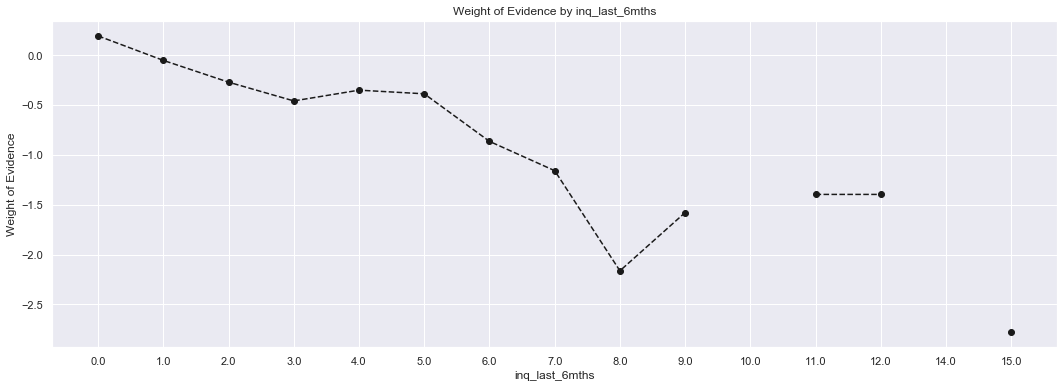

In [88]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [89]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [90]:
# open_acc
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,7,0.714286,0.000075,5.0,2.0,0.000060,0.000195,-1.172291,NaN,NaN,inf
1,1.0,26,0.884615,0.000279,23.0,3.0,0.000277,0.000292,-0.051700,0.170330,1.120591,inf
2,2.0,359,0.821727,0.003850,295.0,64.0,0.003555,0.006227,-0.560490,0.062888,0.508790,inf
3,3.0,1033,0.869313,0.011077,898.0,135.0,0.010822,0.013135,-0.193687,0.047586,0.366803,inf
4,4.0,2562,0.884465,0.027472,2266.0,296.0,0.027308,0.028799,-0.053170,0.015153,0.140517,inf
5,5.0,4288,0.889459,0.045980,3814.0,474.0,0.045963,0.046118,-0.003355,0.004994,0.049814,inf
6,6.0,6222,0.885246,0.066719,5508.0,714.0,0.066378,0.069469,-0.045508,0.004213,0.042153,inf
7,7.0,7492,0.888681,0.080337,6658.0,834.0,0.080237,0.081144,-0.011241,0.003435,0.034267,inf
8,8.0,8474,0.891551,0.090867,7555.0,919.0,0.091047,0.089414,0.018097,0.002869,0.029338,inf
9,9.0,8922,0.884779,0.095671,7894.0,1028.0,0.095133,0.100019,-0.050094,0.006771,0.068191,inf


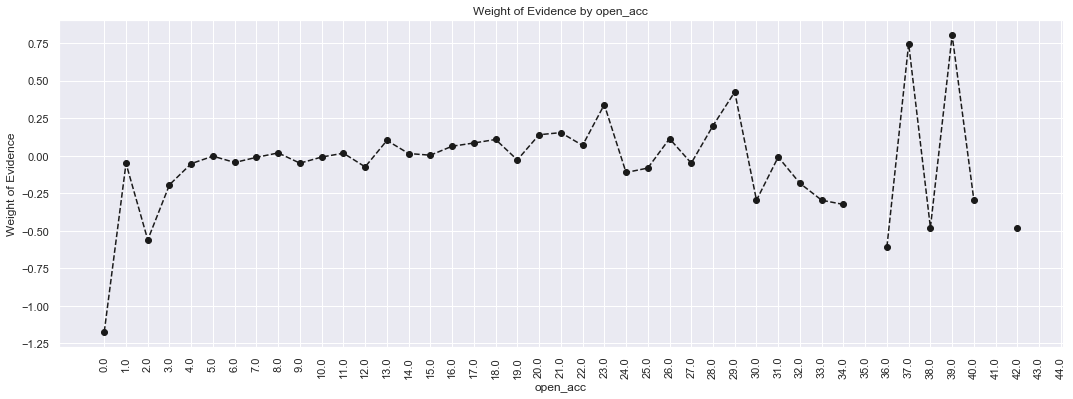

In [91]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

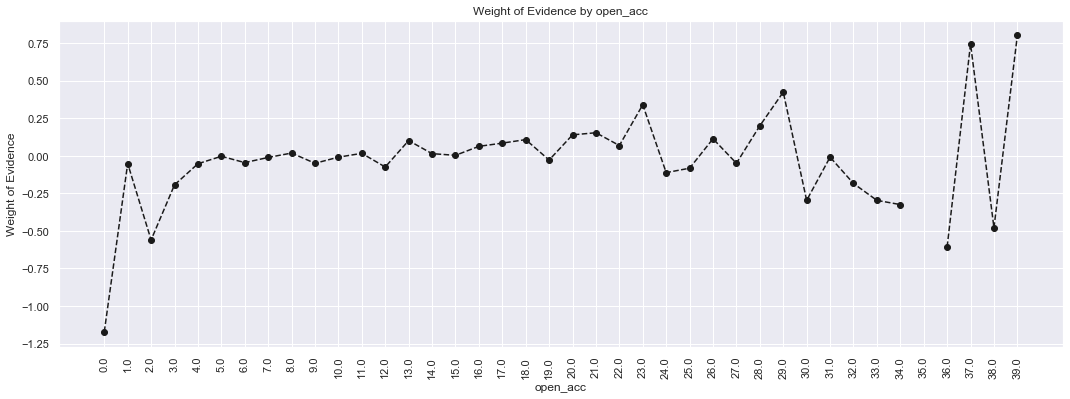

In [92]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)
# We plot the weight of evidence values.

In [93]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [94]:
# pub_rec
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,80874,0.889260,0.867216,71918.0,8956.0,0.866701,0.871376,-0.005379,NaN,NaN,inf
1,1.0,10684,0.891894,0.114565,9529.0,1155.0,0.114836,0.112376,0.021658,0.002635,0.027037,inf
2,2.0,1136,0.897007,0.012181,1019.0,117.0,0.012280,0.011384,0.075821,0.005113,0.054164,inf
3,3.0,326,0.904908,0.003496,295.0,31.0,0.003555,0.003016,0.164406,0.007901,0.088585,inf
4,4.0,112,0.901786,0.001201,101.0,11.0,0.001217,0.001070,0.128643,0.003122,0.035763,inf
5,5.0,58,0.965517,0.000622,56.0,2.0,0.000675,0.000195,1.243623,0.063732,1.114979,inf
6,6.0,27,0.888889,0.000290,24.0,3.0,0.000289,0.000292,-0.009140,0.076628,1.252763,inf
7,7.0,20,0.900000,0.000214,18.0,2.0,0.000217,0.000195,0.108643,0.011111,0.117783,inf
8,8.0,8,1.000000,0.000086,8.0,0.0,0.000096,0.000000,inf,0.100000,inf,inf
9,9.0,5,0.800000,0.000054,4.0,1.0,0.000048,0.000097,-0.702288,0.200000,inf,inf


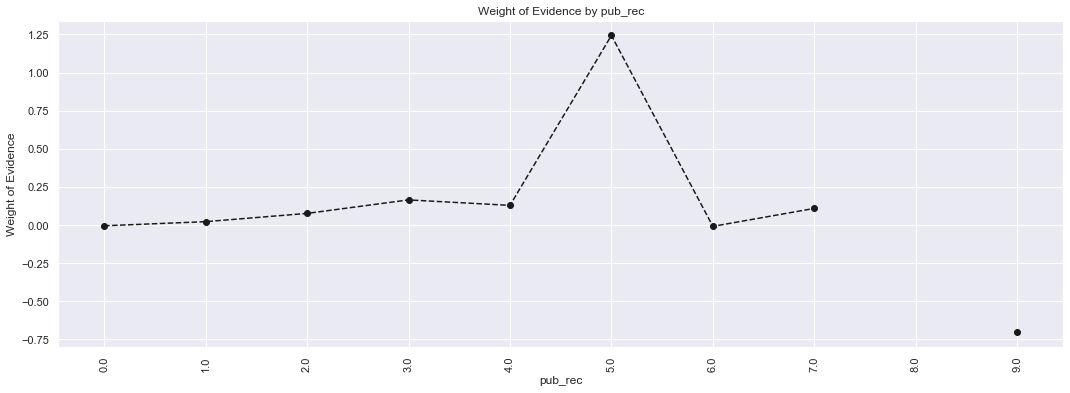

In [95]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [96]:
# Categories '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [97]:
# total_acc
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.106, 2.12]",21,0.761905,0.000225,16.0,5.0,0.000193,0.000486,-0.925431,NaN,NaN,inf
1,"(2.12, 4.24]",409,0.831296,0.004386,340.0,69.0,0.004097,0.006713,-0.493743,0.069391,0.431688,inf
2,"(4.24, 6.36]",1204,0.853821,0.012911,1028.0,176.0,0.012389,0.017124,-0.323695,0.022525,0.170047,inf
3,"(6.36, 8.48]",2206,0.866274,0.023655,1911.0,295.0,0.023030,0.028702,-0.220175,0.012453,0.103520,inf
4,"(8.48, 10.6]",3368,0.869062,0.036115,2927.0,441.0,0.035274,0.042907,-0.195893,0.002788,0.024282,inf
5,"(10.6, 12.72]",4452,0.881177,0.047739,3923.0,529.0,0.047277,0.051469,-0.084958,0.012115,0.110935,inf
6,"(12.72, 14.84]",5407,0.880895,0.057980,4763.0,644.0,0.057400,0.062658,-0.087648,0.000282,0.002689,inf
7,"(14.84, 16.96]",6234,0.881136,0.066848,5493.0,741.0,0.066197,0.072096,-0.085353,0.000241,0.002295,inf
8,"(16.96, 19.08]",9974,0.884500,0.106952,8822.0,1152.0,0.106316,0.112084,-0.052833,0.003364,0.032520,inf
9,"(19.08, 21.2]",6814,0.890520,0.073067,6068.0,746.0,0.073127,0.072582,0.007477,0.006020,0.060310,inf


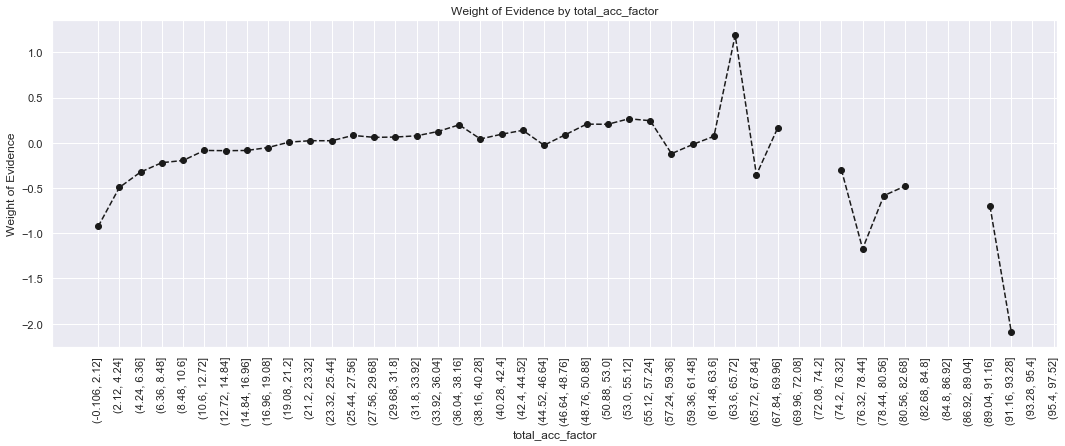

In [98]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [99]:
# Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [100]:
# acc_now_delinq
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,92884,0.889776,0.996000,82646.0,10238.0,0.995987,0.996108,-0.000122,NaN,NaN,inf
1,1.0,351,0.894587,0.003764,314.0,37.0,0.003784,0.003600,0.049893,0.004810,0.050015,inf
2,2.0,18,0.833333,0.000193,15.0,3.0,0.000181,0.000292,-0.479144,0.061254,0.529037,inf
3,3.0,2,1.000000,0.000021,2.0,0.0,0.000024,0.000000,inf,0.166667,inf,inf
4,4.0,2,1.000000,0.000021,2.0,0.0,0.000024,0.000000,inf,0.000000,NaN,inf


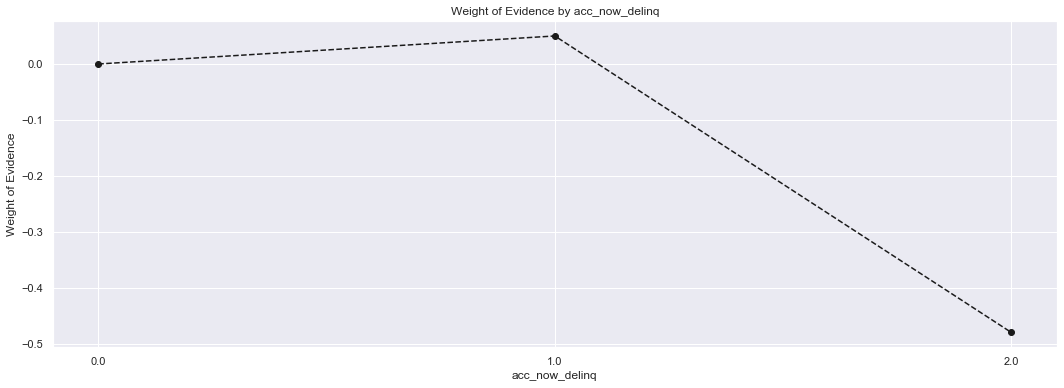

In [101]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [102]:
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [103]:
# total_rev_hi_lim
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
# Here we do fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-867.0, 433.5]",45,0.866667,0.000483,39.0,6.0,0.000470,0.000584,-0.216780,NaN,NaN,inf
1,"(433.5, 867.0]",48,0.916667,0.000515,44.0,4.0,0.000530,0.000389,0.309313,0.050000,0.526093,inf
2,"(867.0, 1300.5]",248,0.822581,0.002659,204.0,44.0,0.002458,0.004281,-0.554652,0.094086,0.863965,inf
3,"(1300.5, 1734.0]",243,0.827160,0.002606,201.0,42.0,0.002422,0.004086,-0.522947,0.004580,0.031705,inf
4,"(1734.0, 2167.5]",376,0.853723,0.004032,321.0,55.0,0.003868,0.005351,-0.324474,0.026563,0.198473,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,"(864832.5, 865266.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1996,"(865266.0, 865699.5]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1997,"(865699.5, 866133.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1998,"(866133.0, 866566.5]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


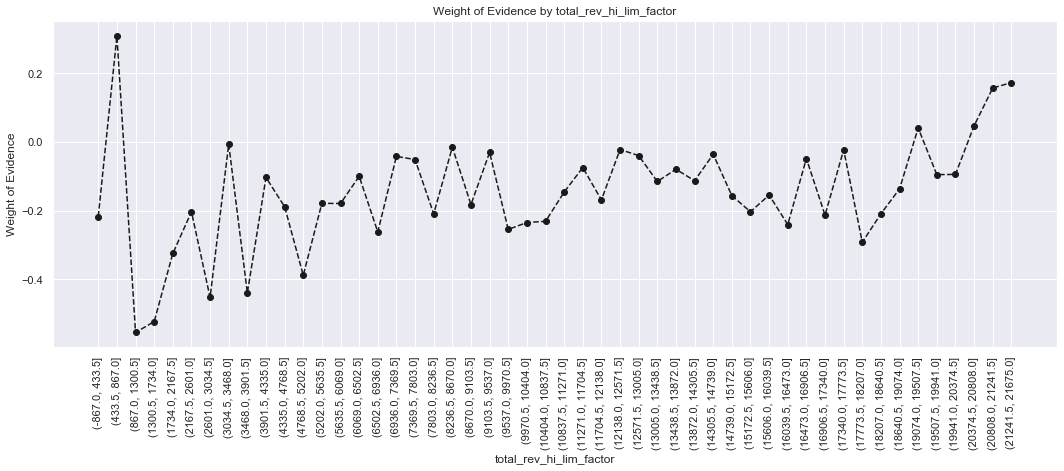

In [104]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)
# We plot the weight of evidence values.

In [105]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [106]:
# installment
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(15.459, 44.676]",529,0.894140,0.005672,473.0,56.0,0.005700,0.005449,0.045162,NaN,NaN,0.015296
1,"(44.676, 72.501]",1265,0.886957,0.013565,1122.0,143.0,0.013521,0.013913,-0.028558,0.007183,0.073720,0.015296
2,"(72.501, 100.327]",1762,0.901249,0.018894,1588.0,174.0,0.019137,0.016929,0.122593,0.014292,0.151152,0.015296
3,"(100.327, 128.152]",2338,0.896493,0.025071,2096.0,242.0,0.025259,0.023545,0.070266,0.004756,0.052327,0.015296
4,"(128.152, 155.978]",2646,0.881708,0.028373,2333.0,313.0,0.028116,0.030453,-0.079875,0.014784,0.150141,0.015296
5,"(155.978, 183.804]",4146,0.890256,0.044458,3691.0,455.0,0.044481,0.044269,0.004773,0.008547,0.084648,0.015296
6,"(183.804, 211.629]",4188,0.904250,0.044908,3787.0,401.0,0.045638,0.039015,0.156786,0.013995,0.152013,0.015296
7,"(211.629, 239.455]",3879,0.890693,0.041595,3455.0,424.0,0.041637,0.041253,0.009262,0.013557,0.147524,0.015296
8,"(239.455, 267.28]",4672,0.902183,0.050098,4215.0,457.0,0.050796,0.044464,0.133140,0.011490,0.123877,0.015296
9,"(267.28, 295.106]",4948,0.885812,0.053058,4383.0,565.0,0.052821,0.054972,-0.039919,0.016371,0.173059,0.015296


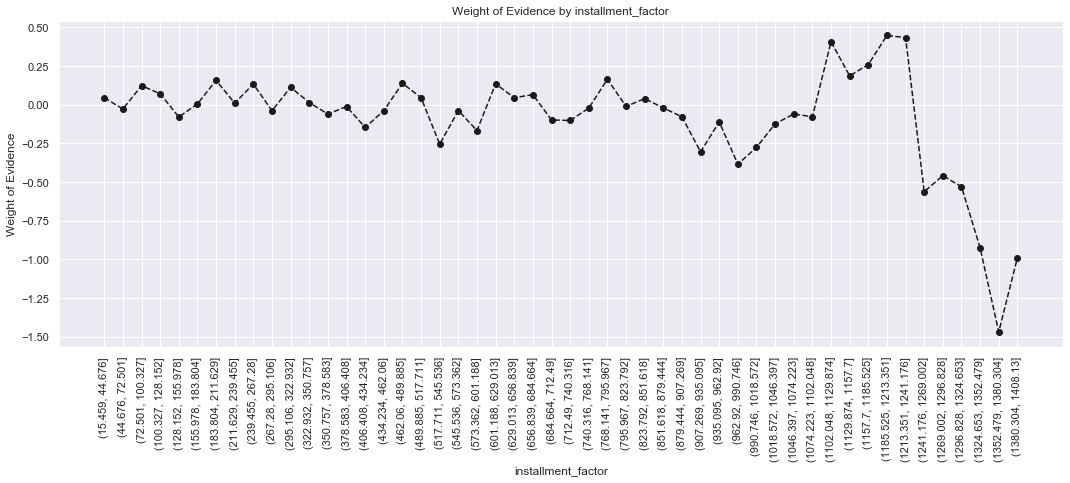

In [107]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 3

In [108]:
# annual_inc
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-3496.0, 153920.0]",89258,0.887965,0.957119,79258.0,10000.0,0.955157,0.972952,-0.018459,NaN,NaN,inf
1,"(153920.0, 303840.0]",3619,0.928433,0.038807,3360.0,259.0,0.040492,0.025199,0.474286,0.040468,0.492745,inf
2,"(303840.0, 453760.0]",250,0.940000,0.002681,235.0,15.0,0.002832,0.001459,0.662953,0.011567,0.188667,inf
3,"(453760.0, 603680.0]",71,0.985915,0.000761,70.0,1.0,0.000844,0.000097,2.159913,0.045915,1.496960,inf
4,"(603680.0, 753600.0]",24,0.958333,0.000257,23.0,1.0,0.000277,0.000097,1.046912,0.027582,1.113001,inf
5,"(753600.0, 903520.0]",13,0.846154,0.000139,11.0,2.0,0.000133,0.000195,-0.383834,0.112179,1.430746,inf
6,"(903520.0, 1053440.0]",6,1.000000,0.000064,6.0,0.0,0.000072,0.000000,inf,0.153846,inf,inf
7,"(1053440.0, 1203360.0]",7,1.000000,0.000075,7.0,0.0,0.000084,0.000000,inf,0.000000,NaN,inf
8,"(1203360.0, 1353280.0]",2,1.000000,0.000021,2.0,0.0,0.000024,0.000000,inf,0.000000,NaN,inf
9,"(1353280.0, 1503200.0]",1,1.000000,0.000011,1.0,0.0,0.000012,0.000000,inf,0.000000,NaN,inf


In [109]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-3496.0, 78960.0]",62447,0.876920,0.669623,54761.0,7686.0,0.659938,0.747811,-0.125004,NaN,NaN,inf
1,"(78960.0, 153920.0]",26811,0.913692,0.287496,24497.0,2314.0,0.295219,0.225141,0.270991,0.036773,0.395995,inf
2,"(153920.0, 228880.0]",2905,0.925645,0.031150,2689.0,216.0,0.032406,0.021016,0.433064,0.011953,0.162073,inf
3,"(228880.0, 303840.0]",714,0.939776,0.007656,671.0,43.0,0.008086,0.004184,0.658987,0.014130,0.225923,inf
4,"(303840.0, 378800.0]",164,0.939024,0.001759,154.0,10.0,0.001856,0.000973,0.645786,0.000752,0.013202,inf
5,"(378800.0, 453760.0]",86,0.941860,0.000922,81.0,5.0,0.000976,0.000486,0.696429,0.002836,0.050644,inf
6,"(453760.0, 528720.0]",38,0.973684,0.000407,37.0,1.0,0.000446,0.000097,1.522336,0.031824,0.825907,inf
7,"(528720.0, 603680.0]",33,1.000000,0.000354,33.0,0.0,0.000398,0.000000,inf,0.026316,inf,inf
8,"(603680.0, 678640.0]",8,0.875000,0.000086,7.0,1.0,0.000084,0.000097,-0.142672,0.125000,inf,inf
9,"(678640.0, 753600.0]",16,1.000000,0.000172,16.0,0.0,0.000193,0.000000,inf,0.125000,inf,inf


In [110]:
# Initial examination shows that there are too few individuals with large income and too many with small income.
# Hence, we are going to have one category for more than 150K, and we are going to apply our approach to determine
# the categories of everyone with 140k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]
#loan_data_temp = loan_data_temp.reset_index(drop = True)
#df_inputs_prepr_temp

In [111]:
df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(3864.0, 6720.0]",6,0.833333,0.000068,5.0,1.0,0.000064,0.000101,-0.454007,NaN,NaN,0.055918
1,"(6720.0, 9440.0]",37,0.918919,0.000422,34.0,3.0,0.000437,0.000303,0.364304,0.085586,0.818310,0.055918
2,"(9440.0, 12160.0]",149,0.785235,0.001697,117.0,32.0,0.001502,0.003235,-0.767006,0.133684,1.131310,0.055918
3,"(12160.0, 14880.0]",195,0.769231,0.002221,150.0,45.0,0.001926,0.004549,-0.859472,0.016004,0.092465,0.055918
4,"(14880.0, 17600.0]",350,0.825714,0.003987,289.0,61.0,0.003710,0.006166,-0.507892,0.056484,0.351580,0.055918
5,"(17600.0, 20320.0]",727,0.843191,0.008282,613.0,114.0,0.007870,0.011523,-0.381278,0.017477,0.126614,0.055918
6,"(20320.0, 23040.0]",736,0.839674,0.008385,618.0,118.0,0.007934,0.011928,-0.407641,0.003517,0.026363,0.055918
7,"(23040.0, 25760.0]",1408,0.852983,0.016040,1201.0,207.0,0.015420,0.020924,-0.305253,0.013309,0.102387,0.055918
8,"(25760.0, 28480.0]",1380,0.857246,0.015721,1183.0,197.0,0.015188,0.019913,-0.270839,0.004263,0.034414,0.055918
9,"(28480.0, 31200.0]",2611,0.857909,0.029744,2240.0,371.0,0.028759,0.037501,-0.265415,0.000662,0.005424,0.055918


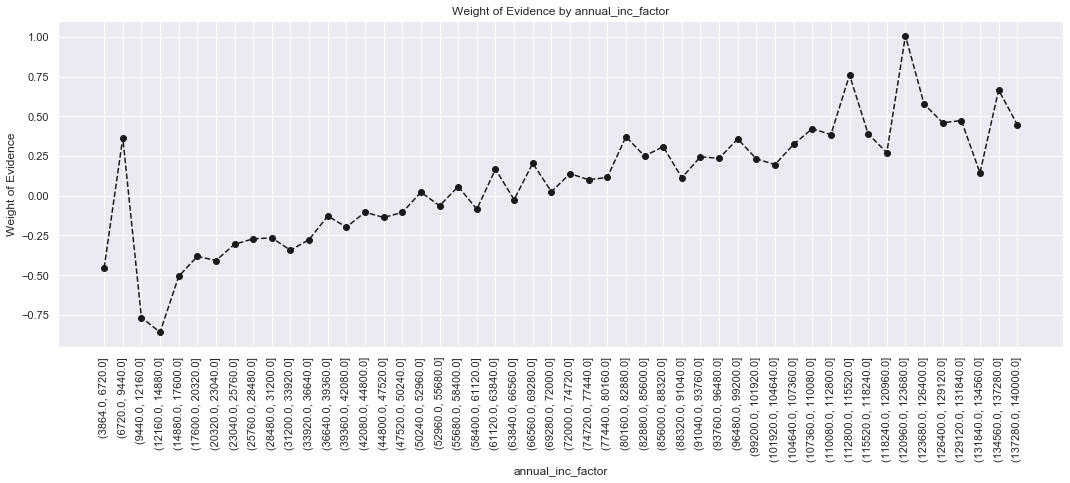

In [112]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [113]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [114]:
# mths_since_last_delinq
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.148, 2.96]",933,0.854234,0.021613,797.0,136.0,0.020717,0.028948,-0.334568,NaN,NaN,inf
1,"(2.96, 5.92]",1604,0.883416,0.037156,1417.0,187.0,0.036833,0.039804,-0.077579,0.029183,0.256989,inf
2,"(5.92, 8.88]",2434,0.877568,0.056383,2136.0,298.0,0.055522,0.063431,-0.133171,0.005849,0.055592,inf
3,"(8.88, 11.84]",2535,0.896252,0.058723,2272.0,263.0,0.059057,0.055981,0.053494,0.018685,0.186665,inf
4,"(11.84, 14.8]",2488,0.888264,0.057634,2210.0,278.0,0.057446,0.059174,-0.029641,0.007989,0.083135,inf
5,"(14.8, 17.76]",2316,0.889465,0.053650,2060.0,256.0,0.053547,0.054491,-0.017484,0.001201,0.012157,inf
6,"(17.76, 20.72]",2307,0.902037,0.053441,2081.0,226.0,0.054093,0.048106,0.117301,0.012573,0.134785,inf
7,"(20.72, 23.68]",2058,0.885811,0.047673,1823.0,235.0,0.047386,0.050021,-0.054115,0.016226,0.171416,inf
8,"(23.68, 26.64]",2067,0.888244,0.047882,1836.0,231.0,0.047724,0.049170,-0.029841,0.002432,0.024274,inf
9,"(26.64, 29.6]",2002,0.904096,0.046376,1810.0,192.0,0.047048,0.040868,0.140819,0.015852,0.170660,inf


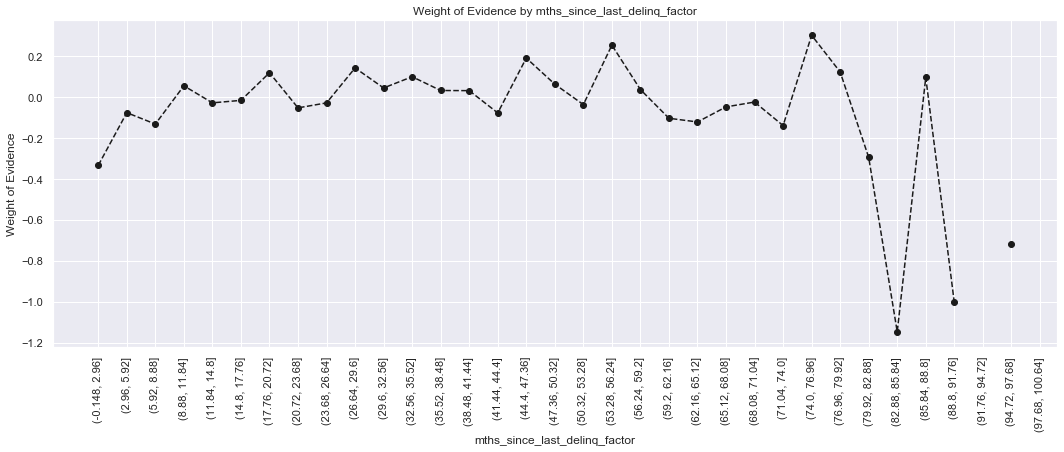

In [115]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [116]:
# Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 3: Homework

In [117]:
# dti
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.04, 0.4]",186,0.876344,0.001994,163.0,23.0,0.001964,0.002238,-0.130326,NaN,NaN,0.033625
1,"(0.4, 0.8]",196,0.954082,0.002102,187.0,9.0,0.002254,0.000876,0.945302,0.077738,1.075628,0.033625
2,"(0.8, 1.199]",220,0.909091,0.002359,200.0,20.0,0.002410,0.001946,0.214003,0.044991,0.731299,0.033625
3,"(1.199, 1.599]",237,0.890295,0.002541,211.0,26.0,0.002543,0.002530,0.005180,0.018796,0.208823,0.033625
4,"(1.599, 1.999]",312,0.913462,0.003346,285.0,27.0,0.003435,0.002627,0.268070,0.023166,0.262891,0.033625
5,"(1.999, 2.399]",330,0.924242,0.003539,305.0,25.0,0.003676,0.002432,0.412854,0.010781,0.144784,0.033625
6,"(2.399, 2.799]",372,0.924731,0.003989,344.0,28.0,0.004146,0.002724,0.419855,0.000489,0.007001,0.033625
7,"(2.799, 3.198]",442,0.909502,0.004740,402.0,40.0,0.004845,0.003892,0.218991,0.015229,0.200865,0.033625
8,"(3.198, 3.598]",474,0.911392,0.005083,432.0,42.0,0.005206,0.004086,0.242174,0.001890,0.023183,0.033625
9,"(3.598, 3.998]",573,0.919721,0.006144,527.0,46.0,0.006351,0.004476,0.349977,0.008328,0.107803,0.033625


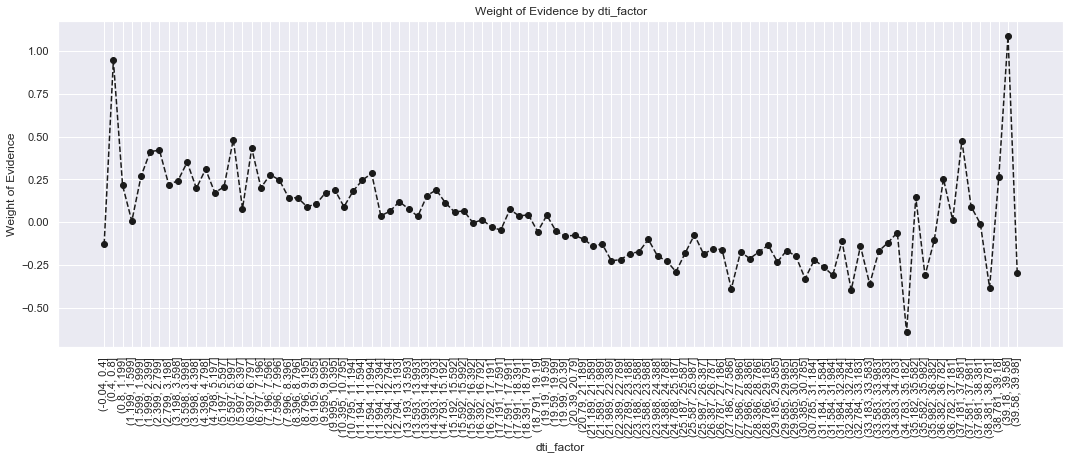

In [118]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [119]:
# Similarly to income, initial examination shows that most values are lower than 200.
# Hence, we are going to have one category for more than 35, and we are going to apply our approach to determine
# the categories of everyone with 150k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [120]:
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.035, 0.7]",330,0.912121,0.003565,301.0,29.0,0.003655,0.002842,0.251592,NaN,NaN,0.029994
1,"(0.7, 1.4]",403,0.900744,0.004354,363.0,40.0,0.004407,0.003920,0.117301,0.011377,0.134291,0.029994
2,"(1.4, 2.1]",503,0.918489,0.005434,462.0,41.0,0.005610,0.004018,0.333771,0.017745,0.216469,0.029994
3,"(2.1, 2.8]",632,0.920886,0.006828,582.0,50.0,0.007067,0.004900,0.366225,0.002397,0.032455,0.029994
4,"(2.8, 3.5]",784,0.914541,0.008470,717.0,67.0,0.008706,0.006565,0.282161,0.006345,0.084064,0.029994
5,"(3.5, 4.2]",972,0.910494,0.010501,885.0,87.0,0.010746,0.008525,0.231457,0.004047,0.050704,0.029994
6,"(4.2, 4.9]",1125,0.914667,0.012154,1029.0,96.0,0.012494,0.009407,0.283772,0.004173,0.052315,0.029994
7,"(4.9, 5.6]",1298,0.908320,0.014023,1179.0,119.0,0.014315,0.011661,0.205076,0.006346,0.078696,0.029994
8,"(5.6, 6.3]",1501,0.915390,0.016216,1374.0,127.0,0.016683,0.012445,0.293072,0.007069,0.087996,0.029994
9,"(6.3, 7.0]",1705,0.913196,0.018419,1557.0,148.0,0.018905,0.014503,0.265082,0.002193,0.027990,0.029994


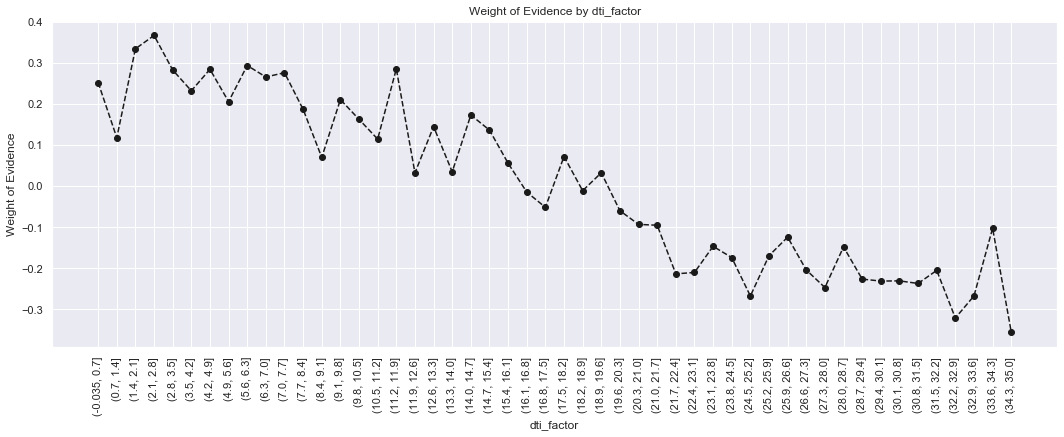

In [121]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [122]:
# Categories:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [123]:
# mths_since_last_record
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
#sum(loan_data_temp['mths_since_last_record'].isnull())
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.119, 2.38]",265,0.750943,0.020967,199.0,66.0,0.017686,0.047585,-0.989753,NaN,NaN,0.126711
1,"(2.38, 4.76]",19,0.894737,0.001503,17.0,2.0,0.001511,0.001442,0.046663,0.143793,1.036416,0.126711
2,"(4.76, 7.14]",48,0.895833,0.003798,43.0,5.0,0.003822,0.003605,0.058359,0.001096,0.011696,0.126711
3,"(7.14, 9.52]",40,0.900000,0.003165,36.0,4.0,0.003199,0.002884,0.103822,0.004167,0.045462,0.126711
4,"(9.52, 11.9]",45,0.933333,0.003560,42.0,3.0,0.003733,0.002163,0.545655,0.033333,0.441833,0.126711
5,"(11.9, 14.28]",89,0.932584,0.007042,83.0,6.0,0.007376,0.004326,0.533678,0.000749,0.011976,0.126711
6,"(14.28, 16.66]",60,0.933333,0.004747,56.0,4.0,0.004977,0.002884,0.545655,0.000749,0.011976,0.126711
7,"(16.66, 19.04]",91,0.956044,0.007200,87.0,4.0,0.007732,0.002884,0.986211,0.022711,0.440556,0.126711
8,"(19.04, 21.42]",84,0.940476,0.006646,79.0,5.0,0.007021,0.003605,0.666607,0.015568,0.319604,0.126711
9,"(21.42, 23.8]",71,0.887324,0.005618,63.0,8.0,0.005599,0.005768,-0.029710,0.053152,0.696317,0.126711


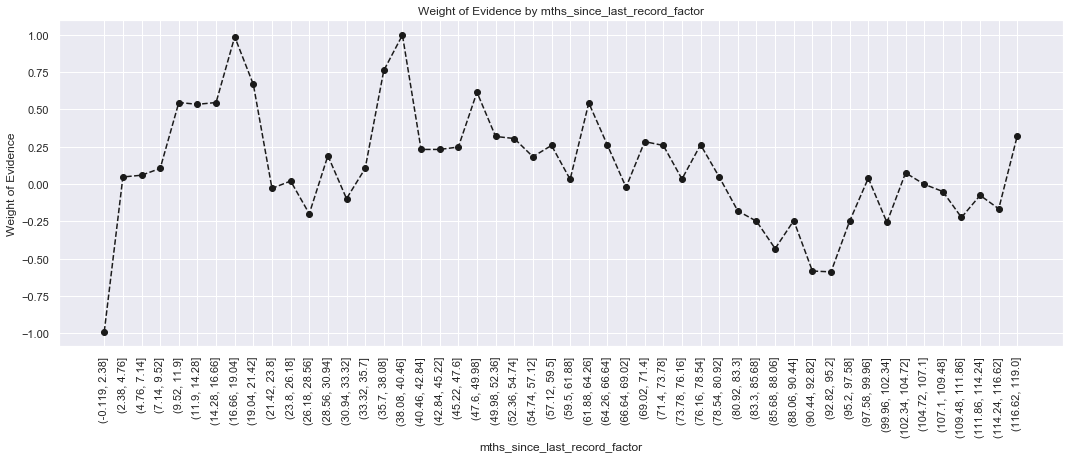

In [124]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [125]:
# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>=86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

### Preprocessing the Test Dataset

In [126]:

if(option ==0):
    loan_data_inputs_train = df_inputs_prepr
    loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
    loan_data_targets_train.to_csv('loan_data_targets_train.csv')
else:
    loan_data_inputs_test = df_inputs_prepr
    loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
    loan_data_targets_test.to_csv('loan_data_targets_test.csv')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
